# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import requests
import plotly.offline as po
import plotly.graph_objs as pg
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

sns.set_style("darkgrid")

# Load Data

In [2]:
# Edgap.org data
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

# School information
url = 'https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1' # Note: Changed dl=0 to dl=1 for a direct download

file_name = 'ccd_sch_029_1617_w_1a_11212017.csv'

# Download / save the the file 
response = requests.get(url)

with open(file_name, 'wb') as file:
    file.write(response.content)

c:\Users\Travis\Documents\SeattleUniversity\DATA_5100\projects\education\.venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



In [3]:
school_information = pd.read_csv(
    "ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape", low_memory=False
)

# Data inspection
 - Checking for size, missing values, and information on datasets. 

In [4]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [5]:
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID    LEAID  ...  \
0  Alabama Youth Services              01    NaN   AL-210  0100002  ...   
1  Alabama Youth Services              01    NaN   AL-210  0100002  ...   
2  Alabama Youth Services              01    NaN   AL-210  0100002  ...   
3  Alabama Youth Services              01    NaN   AL-210  0100002  ...   
4  Alabama Youth Services              01    NaN   AL-210  0100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

In [6]:
pd.set_option('display.max_columns', None)

school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID    LEAID  \
0  Alabama Youth Services              01    NaN   AL-210  0100002   
1  Alabama Youth Services              01    NaN   AL-210  0100002   
2  Alabama Youth Services              01    NaN   AL-210  0100002   
3  Alabama Youth Services              01    NaN   AL-210  0100002   
4  Alabama Youth Services              01    NaN   AL-210  0100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No   

In [7]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [8]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

## Inital visualizations
 -  To easily see relationships between vaiables.

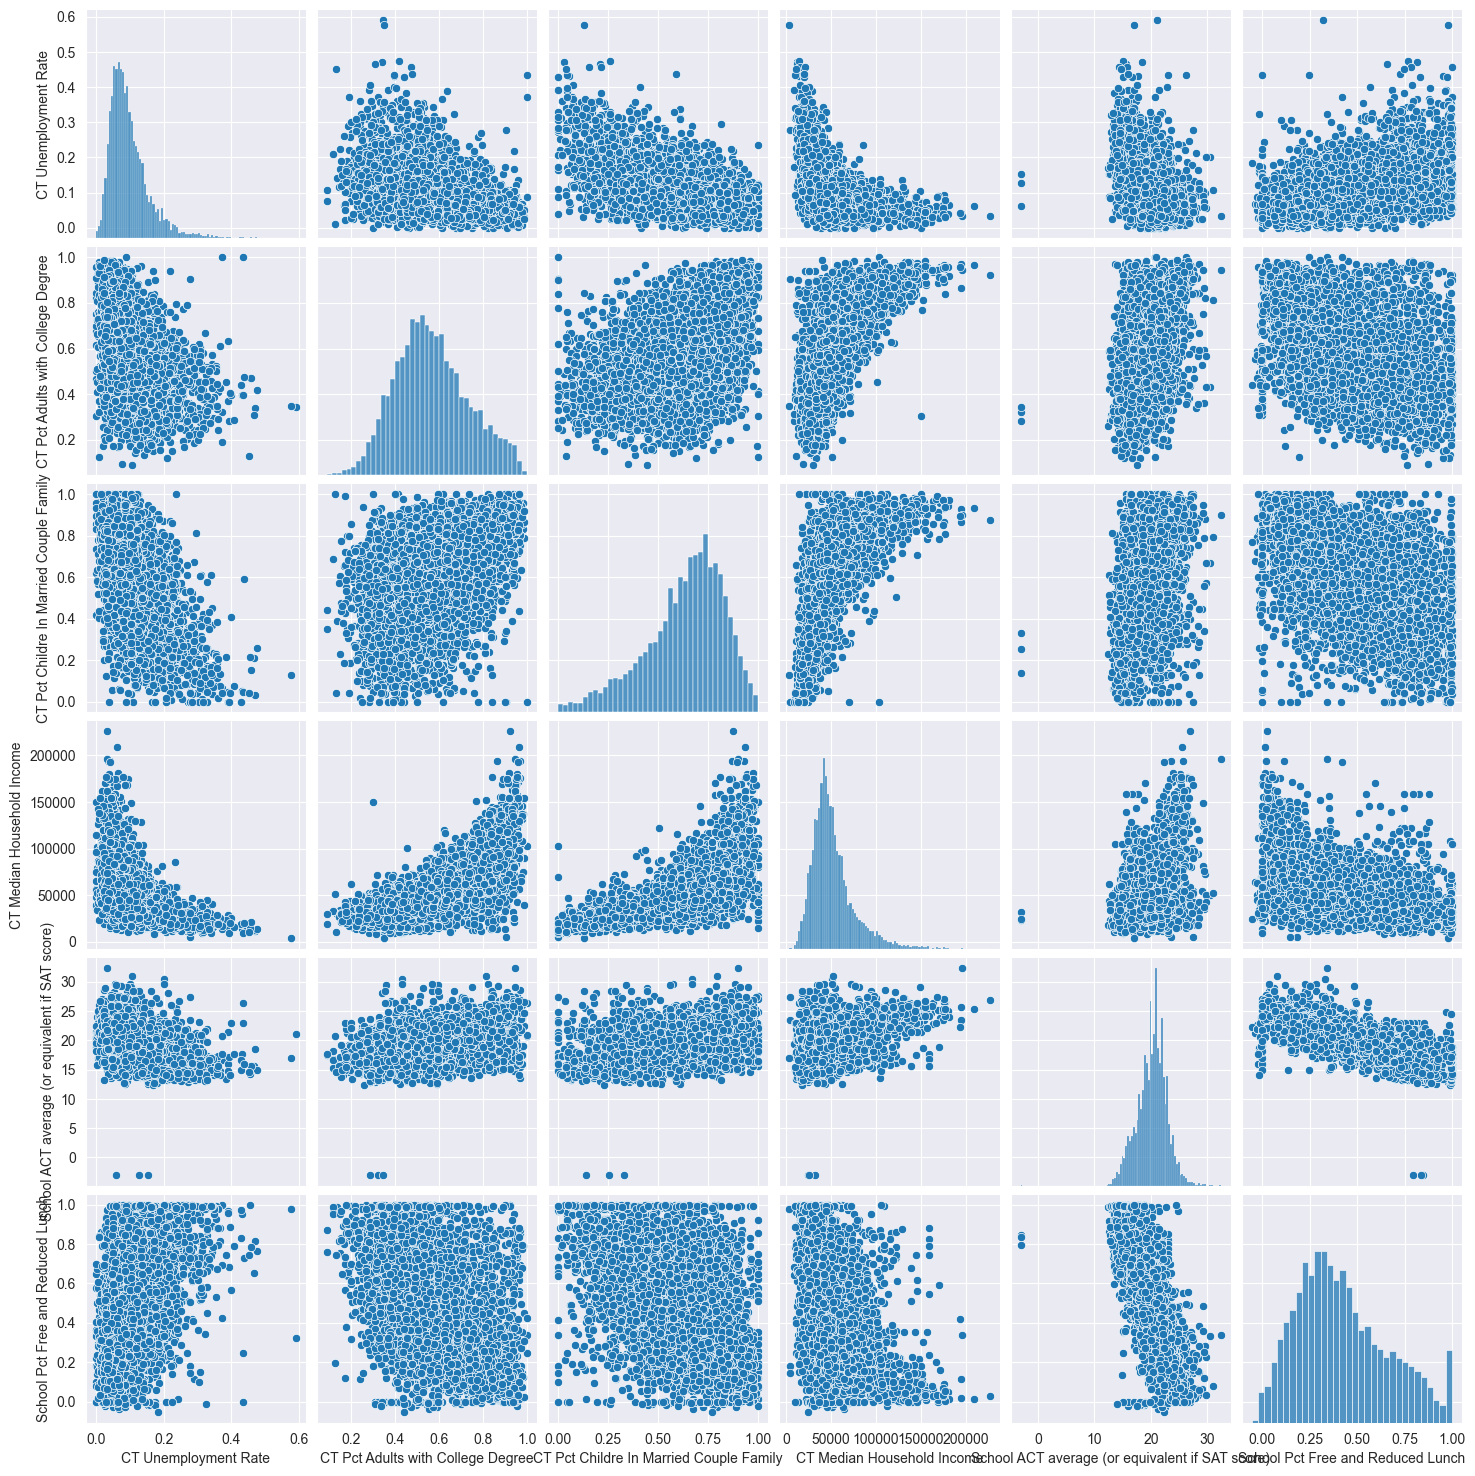

In [9]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);

plt.show()

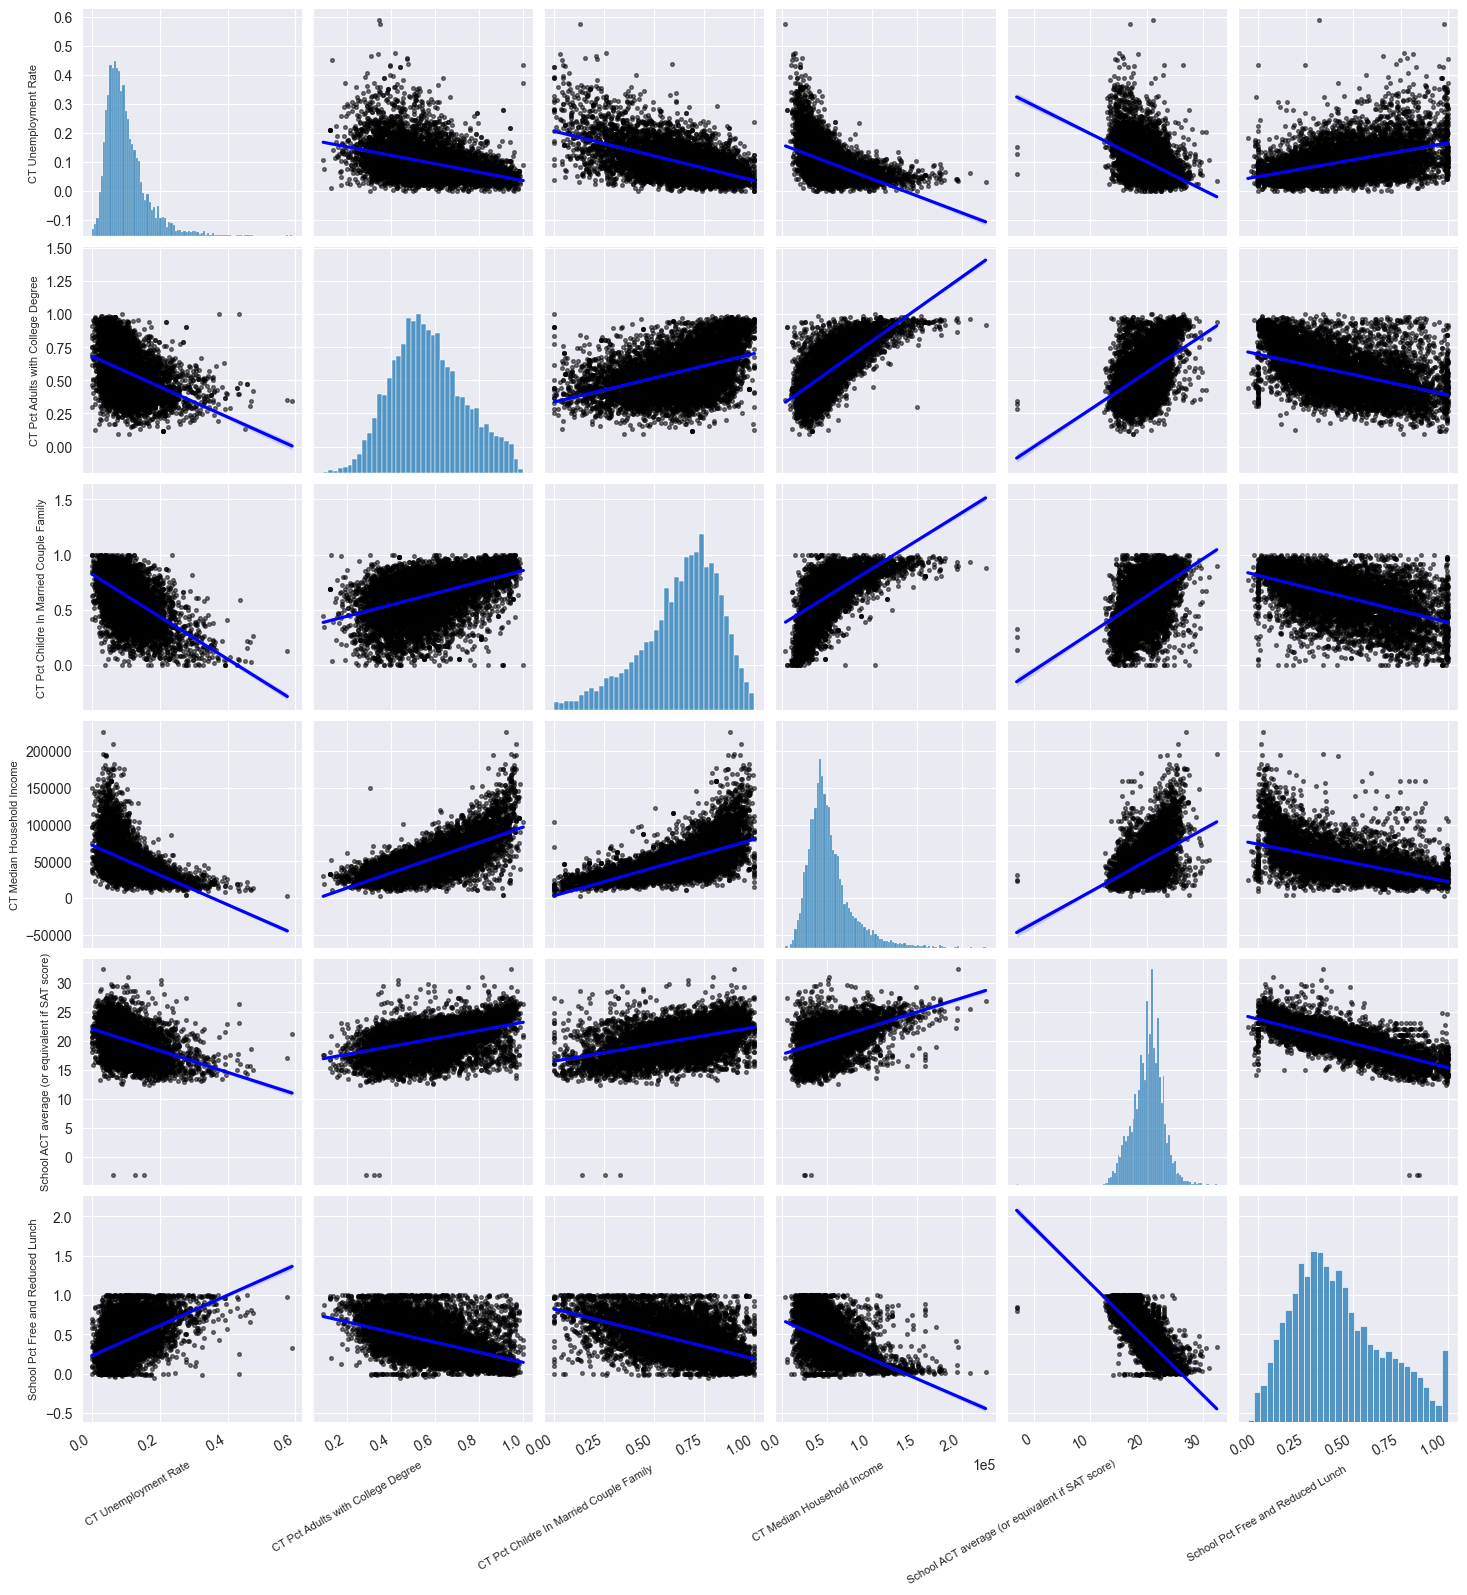

In [10]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

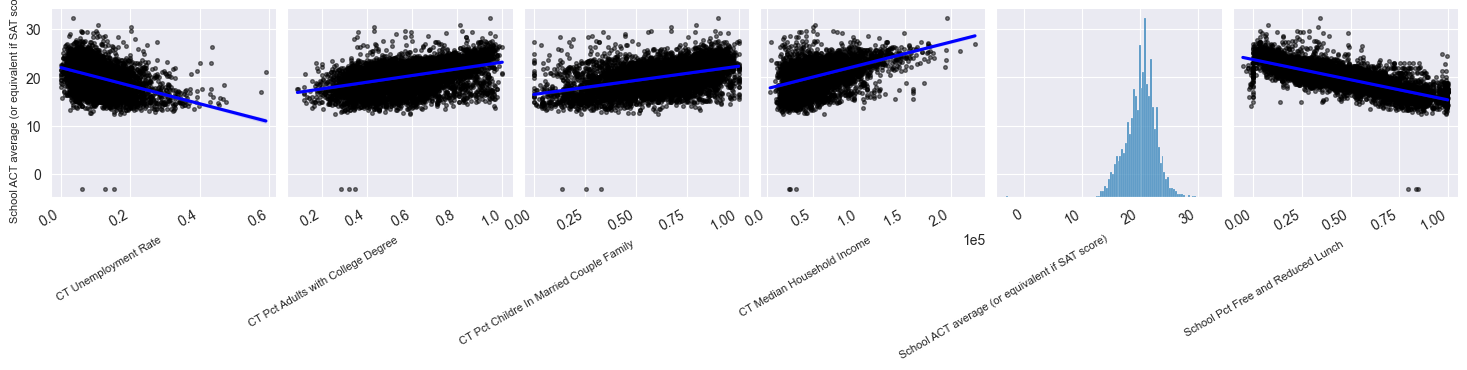

In [11]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

# Data Processing

## Selecting relevant subset
 - The school information dataset contains more columns than we need.

In [12]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [13]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

## Renaming Columns

In [14]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [15]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [16]:
school_information.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

## Joing Dataframes

In [17]:
school_information['id'] = school_information['id'].astype('object')

In [18]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [19]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


## Checking data quality

In [21]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

### Setting out of bounds values to NaN

In [22]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [23]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [24]:
print(df['school_type'].value_counts())

print()
print('---' * 10)
print()


print(df['school_level'].value_counts())

print()
print('---' * 10)
print()

print(df['charter'].value_counts())

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

------------------------------

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

------------------------------

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64


### Keep only highschools

In [25]:
df = df.loc[df['school_level'] == 'High']

### Duplication / missing values check

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

In [28]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

In [29]:
print(df['state'].value_counts())

print()
print('---' * 10)

print("Number of unique states:", df['state'].nunique())

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

------------------------------
Number of unique states: 20


In [30]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

In [31]:
df = df.dropna(subset=['average_act'])

In [32]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

## Data imputation

In [33]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [34]:
imputer = IterativeImputer()

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [35]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [36]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [37]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

### Export Clean dataset

In [38]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

# Exploratory Data Analysis

## Load cleaned dataset

In [40]:
# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

In [39]:
df = pd.read_csv('education_clean.csv')
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state  zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE     19804   
1        89320.0    19.498168       0.112412  2016-2017    DE     19709   
2        84140.0    19.554335       0.096816  2016-2017    DE     19709   
3        56500.0    17.737485       0.296960  2016-2017    DE     19958   
4        54015.0    18.245421       0.262641  2016-2017    DE     19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

## Relationships /  Distributions

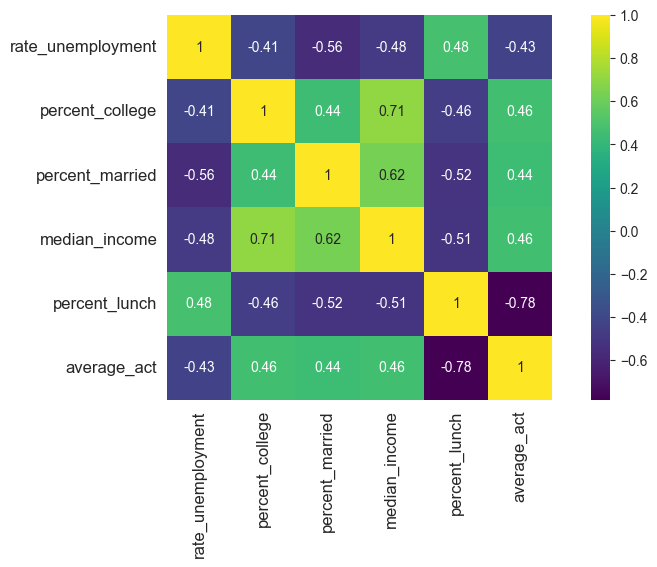

In [41]:
# Correlation Matrix
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']
                       
numerical_predictors = df[predictor_variables].select_dtypes(include = 'number').columns.to_list()

corr_matrix = df[numerical_predictors + ['average_act']].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax = 1, square = True, annot = True, cmap = 'viridis'
)

plt.tick_params(labelsize = 12)

plt.show()

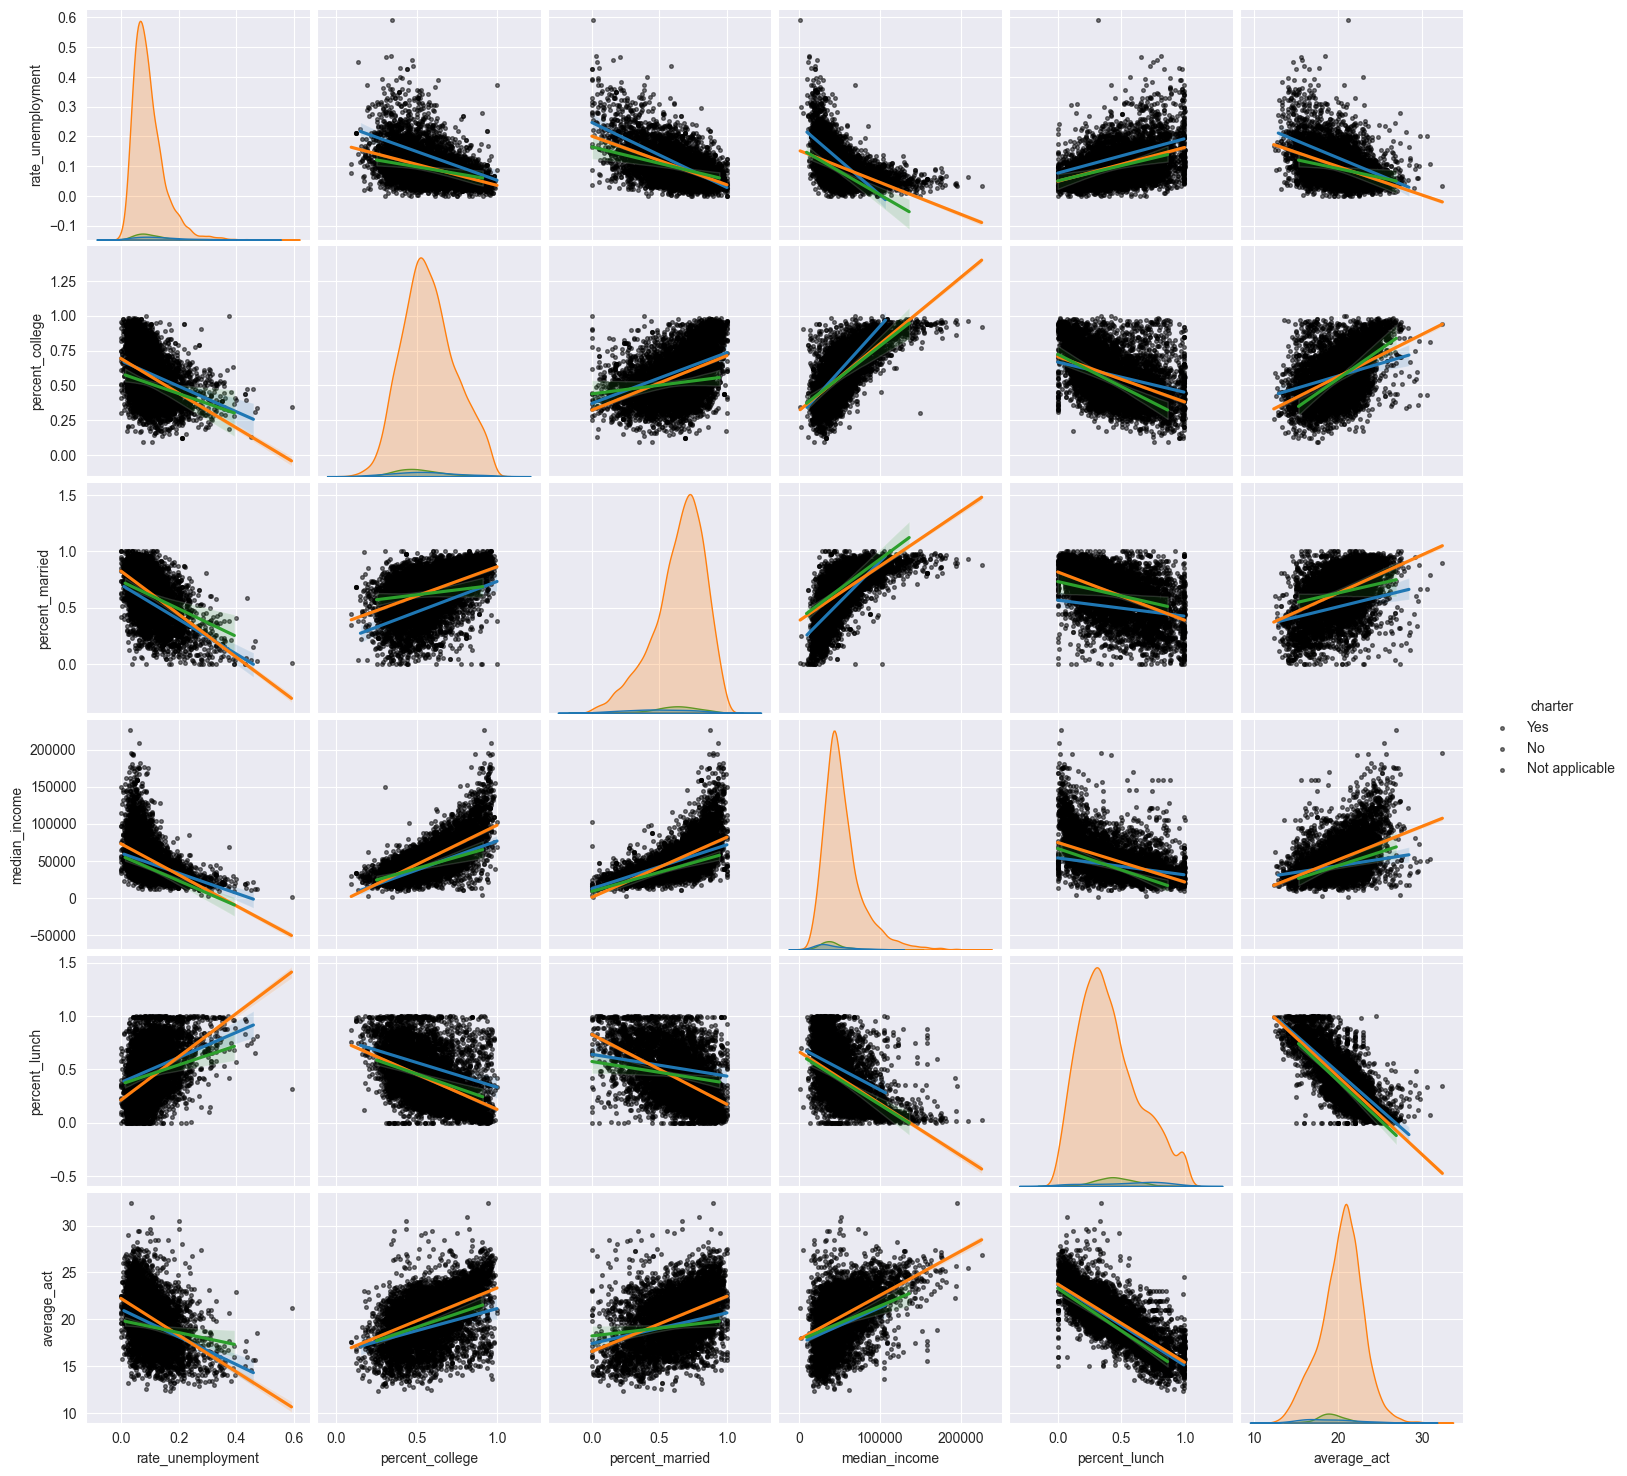

In [43]:
# pairplot
sns.pairplot(
    data = df,
    vars = numerical_predictors + ['average_act'],
    hue = 'charter',
    kind = 'reg',
    plot_kws = {"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}}
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0, 0))  # scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')  
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8)

        plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

## Outlier Identification

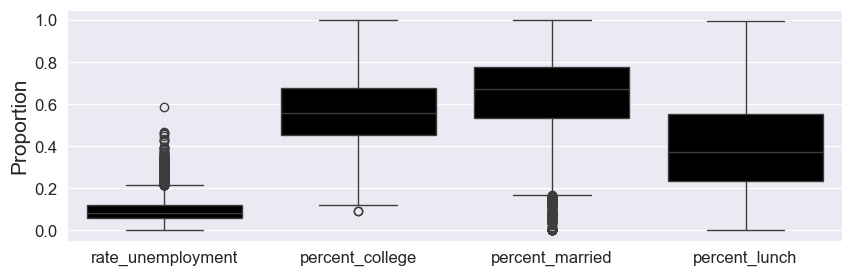

In [46]:
plt.figure(figsize = (10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data = df[fractions], color = 'k')

plt.ylabel('Proportion', fontsize = 15)

plt.tick_params(labelsize = 12)

plt.show()

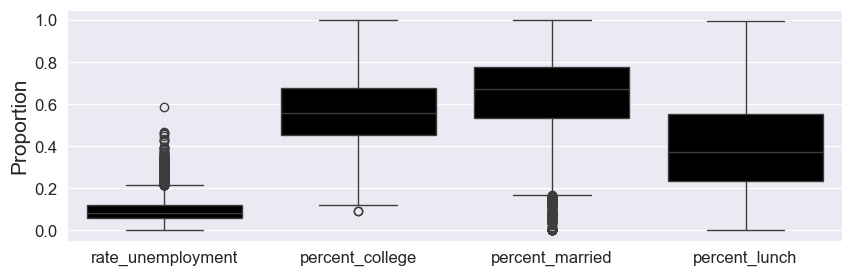

In [48]:
plt.figure(figsize = (10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data = df[fractions], color = 'k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize = 12)

plt.show()

## Summary
- numerical predictors are related to 'average_act'
    - Relationship appears to be linear
- Numerical predictors are correlated with each other, suggesting that not every predictor will be needed.
- Some variables have skewed distributions
    - transformations of input variables could be useful
- Outliers in 'rate_unemployment', 'percent_college', 'percent_married', and 'median_income'
    - likely reflect skewed distributions.

# Modeling

## Single input models

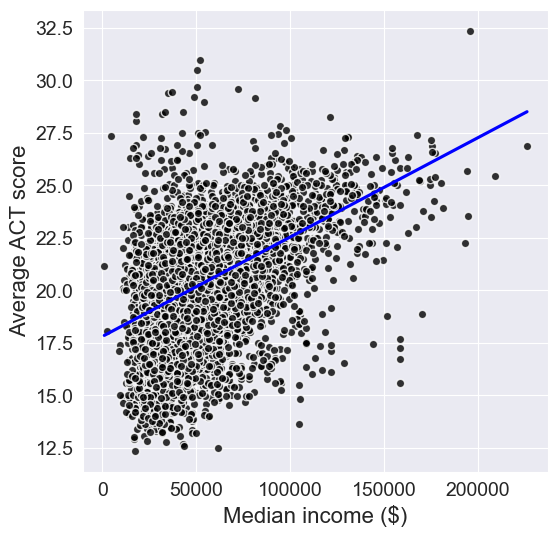

In [ ]:
# Scatter plot with regression line
plt.figure(figsize = (6, 6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

In [51]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:01:51   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

In [56]:
print('R-squared:', model_median_income.rsquared)
print()

y_hat = model_median_income.predict()
print('RMSE:', np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3))
print()

print('MAE:', mean_absolute_error(df['average_act'], y_hat))

R-squared: 0.21118648979301158

RMSE: 2.228

MAE: 1.7129386980688501


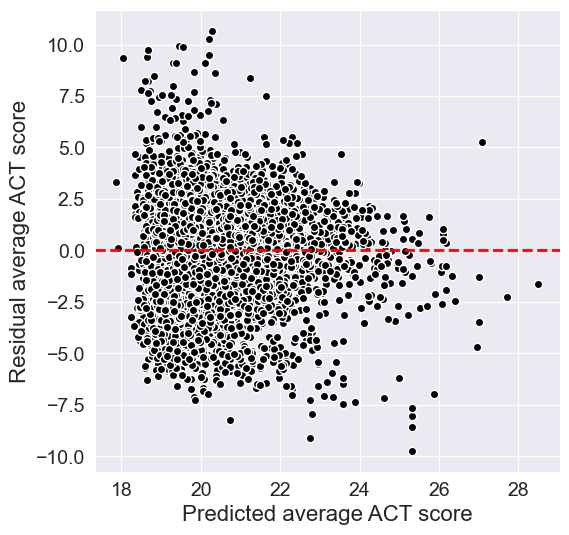

In [57]:
# resdidual plot
plt.figure(figsize = (6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec = 'w')
plt.axhline(0, color='r', linestyle='dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

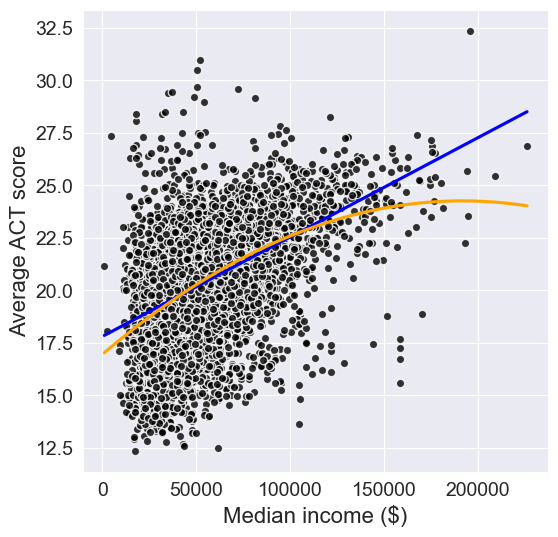

In [ ]:
# quardratic model
plt.figure(figsize = (6, 6))

sns.regplot(data = df,
            x = 'median_income',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data = df,
            x = 'median_income',
            y = 'average_act',
            order = 2,
            color = 'orange',
            ci = False,
            scatter = False)

plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize = 14)

plt.show()

In [60]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df).fit()

print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:06:34   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

In [68]:
# model significance
print(model_median_income2.pvalues)

print()
print("---" * 30)
print()

print(anova_lm(model_median_income, model_median_income2))

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

------------------------------------------------------------------------------------------

   df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17


In [76]:
# model accuracy
print('MAE:', mean_absolute_error(df['average_act'], model_median_income2.predict()))

print()
print("---" * 20)
print()

print('Quadradic MAE:', mean_absolute_error(df['average_act'], model_median_income.predict()))

MAE: 1.6972389257572613

------------------------------------------------------------

Quadradic MAE: 1.7129386980688501


### Unemployment Rate

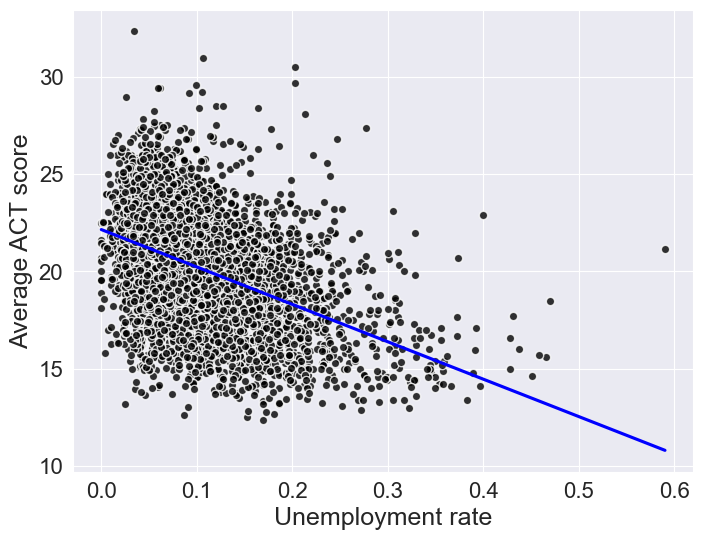

In [ ]:
plt.figure(figsize = (8, 6))

sns.regplot(data = df,
            x = 'rate_unemployment',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

plt.tick_params(labelsize = 16)

plt.show()

In [ ]:
# significance and summary
model_ru = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()
print(model_ru.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:50   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1512      0.05

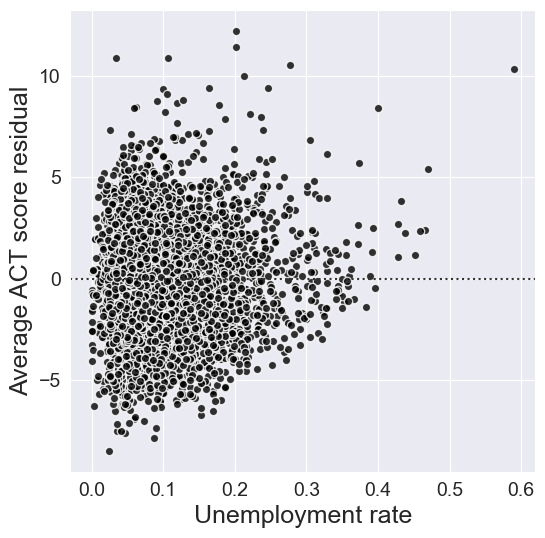

In [79]:
# residual plot
plt.figure(figsize = (6,6))

# residual plot
sns.residplot(data = df,
              x = 'rate_unemployment',
              y = 'average_act',
              scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score residual', fontsize = 18)

plt.tick_params(labelsize = 14)

plt.show()

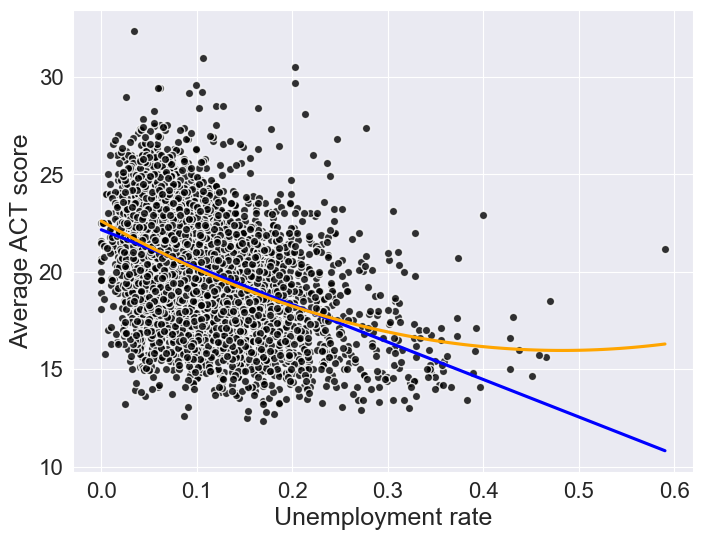

In [81]:
# quadratic model plot
plt.figure(figsize = (8,6))

sns.regplot(x = 'rate_unemployment',
            y = 'average_act',
            color = 'blue',
            data = df,
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(x = 'rate_unemployment',
            y = 'average_act',
            color = 'orange',
            order = 2,
            data = df,
            ci = False,
            scatter = False)

plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

plt.tick_params(labelsize = 16)

plt.show()

In [85]:
model_ru2 = smf.ols(formula='average_act ~ rate_unemployment + I(rate_unemployment**2)', data=df).fit()

print(model_ru2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     865.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:13:00   Log-Likelihood:                -16125.
No. Observations:                7227   AIC:                         3.226e+04
Df Residuals:                    7224   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

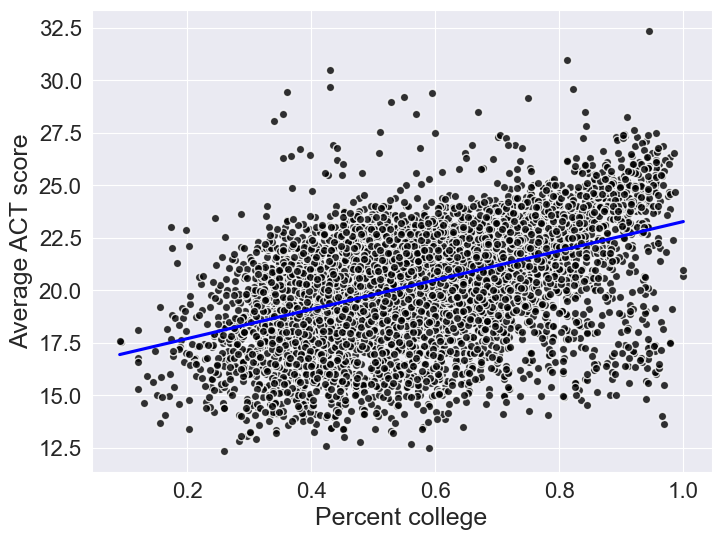

In [86]:
plt.figure(figsize = (8,6))

sns.regplot(data = df,
            x = 'percent_college',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

plt.xlabel('Percent college', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

plt.tick_params(labelsize = 16);

In [87]:
model_pc = smf.ols(formula='average_act ~ percent_college', data=df).fit()
print(model_pc.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:14:08   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3039      0.095    1

## Percent of adults married

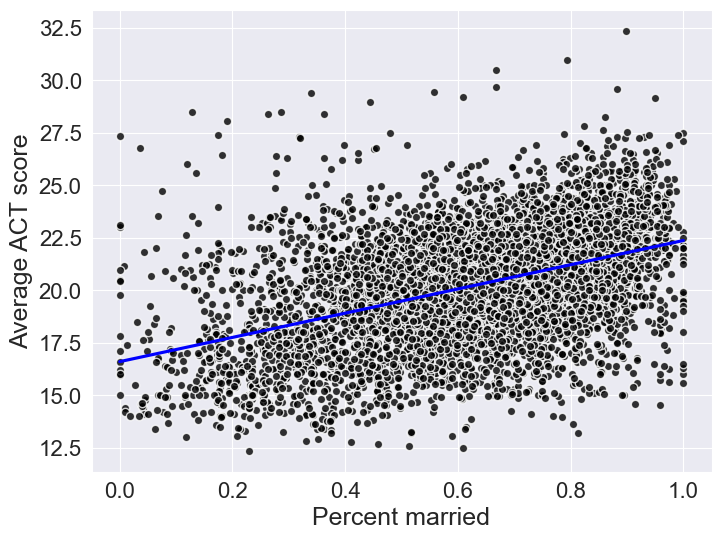

In [88]:
plt.figure(figsize = (8,6))


sns.regplot(data = df,
            x = 'percent_married',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent married', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [89]:
model_pm = smf.ols(formula='average_act ~ percent_married', data=df).fit()
print(model_pm.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6046      0.093    1

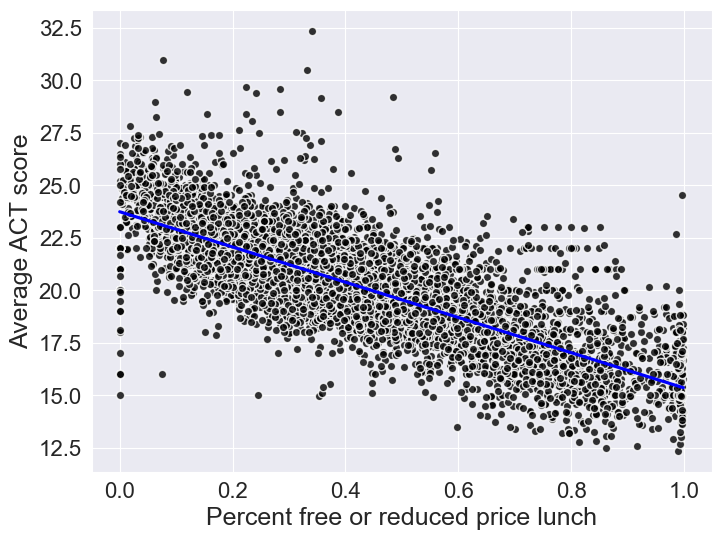

In [90]:
plt.figure(figsize = (8,6))

sns.regplot(data = df,
            x = 'percent_lunch',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent free or reduced price lunch', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [91]:
model_pl = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

print(model_pl.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:15:12   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

## Multiple Linear Regression

In [93]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:15:37   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

In [94]:
y_hat = model.predict()

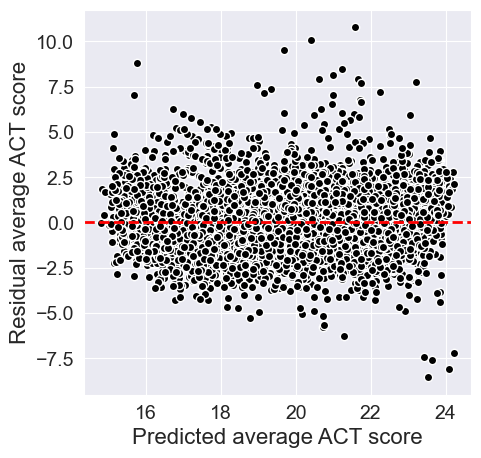

In [95]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [97]:
print('MAE:', mean_absolute_error(df['average_act'], model.predict()))


MAE: 1.1453304788886232


In [99]:
# reduced model
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch',
    data=df).fit()

In [100]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:16:49   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

In [103]:
y_hat = model_reduced.predict()

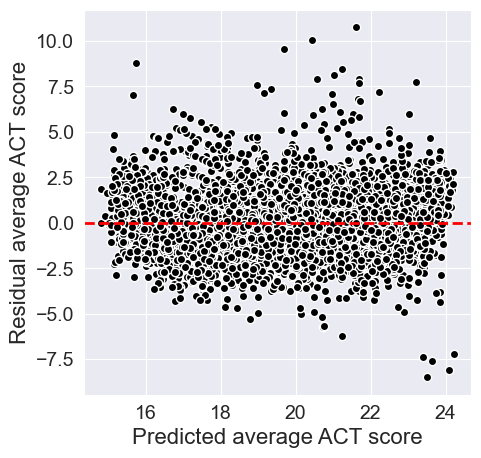

In [104]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [105]:
print('MAE:', mean_absolute_error(df['average_act'], model_reduced.predict()))

MAE: 1.1454832950346363


In [106]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1455     0.6279

In [107]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

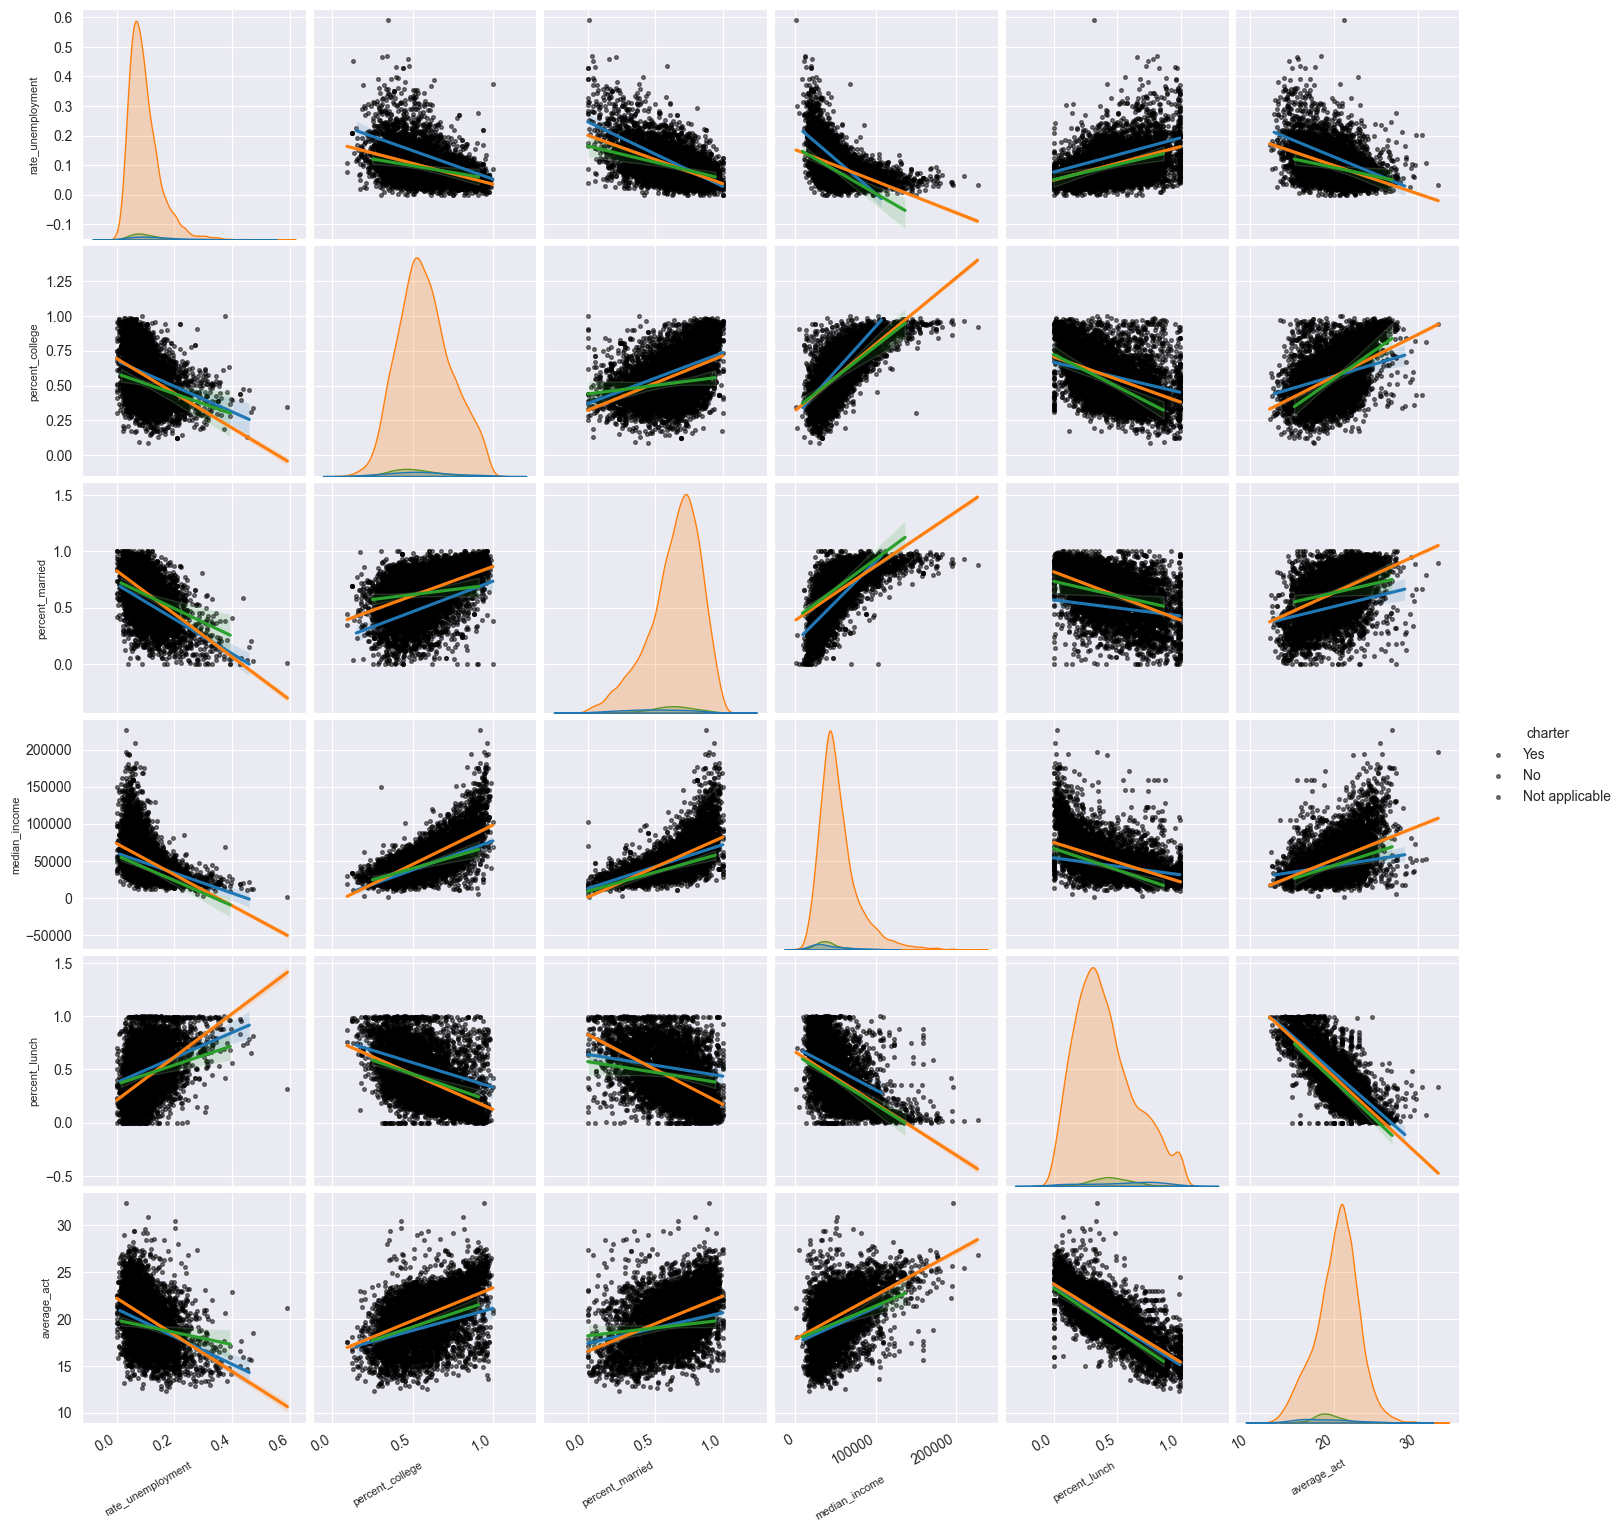

In [108]:
fig = sns.pairplot(
    data = df,
    vars = numerical_predictors + ['average_act'],
    hue = 'charter',
    kind = "reg",
    plot_kws = {"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))  # scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

In [109]:
model_charter = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + C(charter)',
    data=df).fit()

print(model_charter.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2459.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:18:54   Log-Likelihood:                -13308.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7221   BIC:                         2.667e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

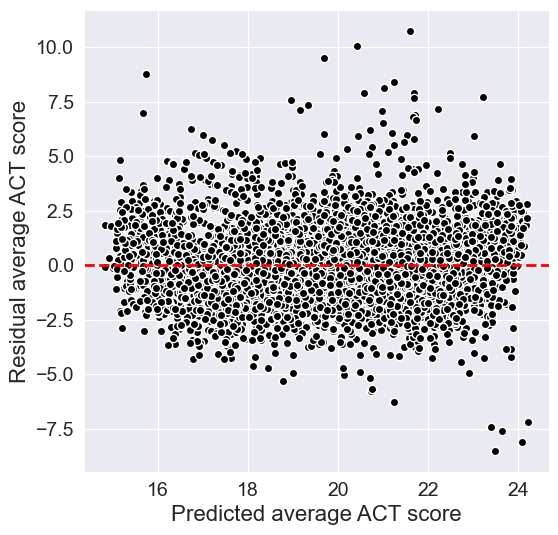

In [110]:
plt.figure(figsize = (6,6))

plt.plot(y_hat, model_charter.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle='dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

In [111]:
print('MAE:', mean_absolute_error(df['average_act'], model_charter.predict()))

MAE: 1.140411451570866


In [113]:
model_charter2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)', data=df).fit()

print(model_charter2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1120.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:19:27   Log-Likelihood:                -13301.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7215   BIC:                         2.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

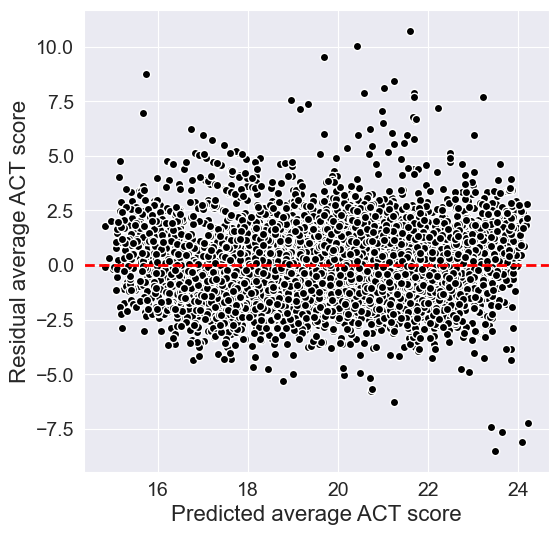

In [114]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter2.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [115]:
anova_lm(model_charter, model_charter2)

df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0    7221.0  16821.669533      0.0        NaN       NaN       NaN
1    7215.0  16789.186717      6.0  32.482816  2.326532  0.030205

In [117]:
print('MAE:', mean_absolute_error(df['average_act'], model_charter2.predict()))

print('Intercept model MAE:', mean_absolute_error(df['average_act'], model_charter.predict()))

MAE: 1.1397334286120249
Intercept model MAE: 1.140411451570866


In [119]:
from patsy import dmatrices

In [120]:
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)',
                        data=df,
                        return_type='dataframe'
                        )

X_design.head()

Intercept  C(charter)[T.Not applicable]  C(charter)[T.Yes]  \
0        1.0                           0.0                1.0   
1        1.0                           0.0                0.0   
2        1.0                           0.0                0.0   
3        1.0                           0.0                0.0   
4        1.0                           0.0                0.0   

   rate_unemployment  rate_unemployment:C(charter)[T.Not applicable]  \
0           0.117962                                             0.0   
1           0.063984                                             0.0   
2           0.056460                                             0.0   
3           0.044739                                             0.0   
4           0.077014                                             0.0   

   rate_unemployment:C(charter)[T.Yes]  percent_college  \
0                             0.117962         0.445283   
1                             0.000000         0.662765   
2                             0.000000         0.701864   
3                             0.000000         0.692062   
4                             0.000000         0.640060   

   percent_college:C(charter)[T.Not applicable]  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   percent_college:C(charter)[T.Yes]  percent_lunch  \
0                           0.445283       0.066901   
1                           0.000000       0.112412   
2                           0.000000       0.096816   
3                           0.000000       0.296960   
4                           0.000000       0.262641   

   percent_lunch:C(charter)[T.Not applicable]  percent_lunch:C(charter)[T.Yes]  
0                                         0.0                         0.066901  
1                                         0.0                         0.000000  
2                                         0.0                         0.000000  
3                                         0.0                         0.000000  
4                                         0.0                         0.000000

In [121]:
X = X_design.loc[:, model_charter2.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'C(charter)[T.Yes]', 'rate_unemployment',
       'rate_unemployment:C(charter)[T.Yes]', 'percent_college',
       'percent_college:C(charter)[T.Yes]', 'percent_lunch'],
      dtype='object')


In [122]:
model_charter3 = sm.OLS(y, X).fit()

print(model_charter3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2036.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:21:08   Log-Likelihood:                -13322.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7220   BIC:                         2.671e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [123]:
print('MAE 3:', mean_absolute_error(df['average_act'], model_charter3.predict()))
print('MAE 2:', mean_absolute_error(df['average_act'], model_charter2.predict()))
print('MAE 1:', mean_absolute_error(df['average_act'], model_charter.predict()))

MAE 3: 1.145173295471904
MAE 2: 1.1397334286120249
MAE 1: 1.140411451570866


### Scaling

In [124]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [127]:
scaler = StandardScaler().fit(df[predictor_variables])

df[scaled_columns] = scaler.transform(df[predictor_variables])

df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                       0.0  
std                        1.0

In [128]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:23:03   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [129]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1455     0.6279